In [ ]:
# Install Dependencies
!pip3 install Pillow
!pip3 install numpy
!pip3 install ipywidgets
!pip3 install matplotlib


In [1]:
# Notebook Settings
%config IPCompleter.greedy=True

In [33]:
# Importing Dependencies
import os, copy,math
import ipywidgets as widgets
import numpy as np

from IPython.display import display, clear_output
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
# Load file names
my_path = "./samples"
files = [f for f in os.listdir(my_path) if os.path.isfile(os.path.join(my_path, f)) ]

In [4]:
# Select Image

# Make a Dropdown Selector
files_dropdown = widgets.Dropdown(
    options=files,
    value=files[0],
    description='Imagem:',
    disabled=False,
)

# Display the dropdown selector
display(files_dropdown)

# Create the file 
file = files[0]

# Function that changes the file variable when we select another image
def select_image(image_name):
    global file
    file = image_name

# Listen for changes in the dropdown
files_dropdown.observe(lambda b: select_image(b['new']), names="value")

Dropdown(description='Imagem:', options=('lena256color.jpg', 'IMG_0103.png', 'testpat.1k.png', 'CNN1.png', '28…

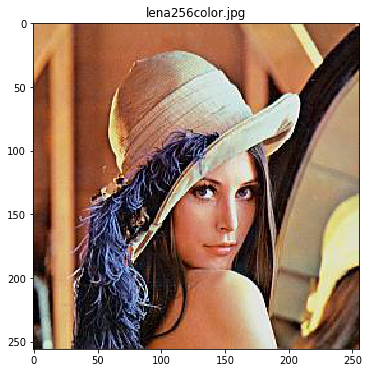

In [5]:
# open the image
img = Image.open(os.path.join(my_path, file))

img_array = np.asarray(img)

img_height = len(img_array)
img_width = len(img_array[0])

# Display the original Image
def show(img_array, scale, title = ""):
    plt.figure(figsize = scale)
    plt.title(title)
    plt.imshow(img_array, aspect="equal", origin="upper")
    
show(img_array, scale=(60,6), title=file)

# RGB -> YIQ Conversion

Converting image to YIQ...
Image successfully converted


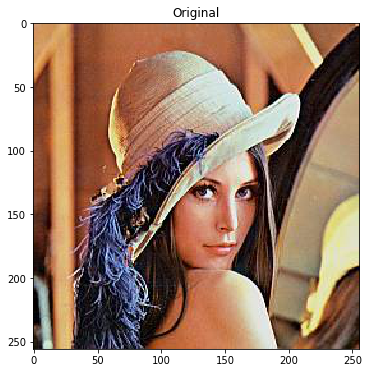

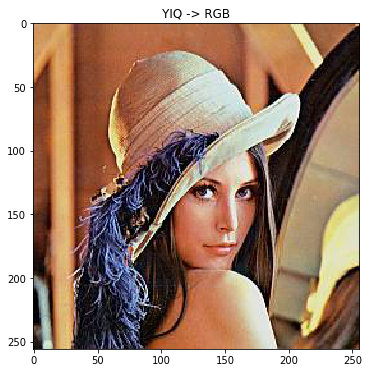

In [6]:
# RGB -> YIQ Conversion

"""
Conversão de RGB para YIQ
Y = 0.299R + 0.587G + 0.114B
I = 0.596R – 0.274G –0.322B
Q = 0.211R – 0.523G + 0.312B

Conversão de YIQ para RGB
R = 1.000 Y + 0.956 I + 0.621 Q
G = 1.000 Y – 0.272 I – 0.647 Q
B = 1.000 Y – 1.106 I + 1.703 Q
"""
def rgb_to_yiq(rgb):
    """Converte pixel RGB para YIQ"""
    Y = (0.299 * rgb[0]) + (0.587 * rgb[1]) + (0.114 * rgb[2])
    I = (0.596 * rgb[0]) - (0.274 * rgb[1]) - (0.322 * rgb[2])
    Q = (0.211 * rgb[0]) - (0.523 * rgb[1]) + (0.312 * rgb[2])
    return [Y,I,Q]

def RGBYIQ(rgb_image, height, width):
    """Converte imagem RGB para YIQ"""
    yiq_image = copy.deepcopy(rgb_image)
    yiq_image = yiq_image.astype(float)

    print("Converting image to YIQ...")
    for y in range(height):
        for x in range(width):
            yiq_image[y][x] = rgb_to_yiq(rgb_image[y][x])
    print("Image successfully converted")
    
    return yiq_image

def yiq_to_rgb(yiq):
    """Converte pixel YIQ para RGB """
    R = (1.000 * yiq[0] + 0.956 * yiq[1] + 0.621 * yiq[2])

    if R > 255:
        R = 255
    elif R < 0:
        R = 0

    G = (1.000 * yiq[0] - 0.272 * yiq[1] - 0.647 * yiq[2])

    if G > 255:
        G = 255
    elif G < 0:
        G = 0

    B = (1.000 * yiq[0] - 1.106 * yiq[1] + 1.703 * yiq[2])

    if B > 255:
        B = 255
    elif B < 0:
        B = 0

    return [R,G,B]

def YIQRGB(yiq_image, height, width):
    """Converte imagem YIQ para RGB """
    rgb_image = copy.deepcopy(yiq_image)

    for y in range(height):
        for x in range(width):
            rgb_image[y][x] = yiq_to_rgb(yiq_image[y][x])
    
    return np.uint8(rgb_image)

def converte(img, height, width):
    img_array = copy.deepcopy(img)
    img_height = copy.deepcopy(height)
    img_width = copy.deepcopy(width)
    
    yiq_image = RGBYIQ(img_array, img_height, img_width)
    rgb_image = YIQRGB(yiq_image, img_height, img_width)

    show(img_array, scale=(60,6), title="Original")
    show(rgb_image, (60,6), "YIQ -> RGB")

converte(img_array, img_height, img_width)

# RGB Bands

In [8]:
# Select Image

# Create a Band dropdown selector
band_dropdown = widgets.Dropdown(
    options=["R","G", "B"],
    value="R",
    description='Banda:',
    disabled=False,
)

# Create a img type dropdown selector
img_type_dropdown = widgets.Dropdown(
    options=["Color", "Monocromatica"],
    value="Color",
    description='Tipo:',
    disabled=False,
)

# Global variables
band = "R"
img_type = "Color"
                       
def select_band_listener(new_band):
    global band
    band = new_band
    
def select_type_listener(new_type):
    global img_type
    img_type = new_type

# Listen for changes in the dropdown
band_dropdown.observe(lambda b: select_band_listener(b['new']), names="value")
img_type_dropdown.observe(lambda b: select_type_listener(b['new']), names="value")

In [9]:
def color_band(img, height, width, band):
    """Seleciona uma banda RGB para exibição colorida"""
    rgb_img = copy.deepcopy(img)
    
    if band is "R":
        for y in range(height):
            for x in range(width):
                rgb_img[y][x][1] = 0
                rgb_img[y][x][2] = 0
    if band is "G":
        for y in range(height):
            for x in range(width):
                rgb_img[y][x][0] = 0
                rgb_img[y][x][2] = 0
    if band is "B":
        for y in range(height):
            for x in range(width):
                rgb_img[y][x][0] = 0
                rgb_img[y][x][1] = 0         
    return rgb_img

def mono_band(img, height, width, band):
    """Seleciona uma banda RGB para exibição monocromática"""
    rgb_image = copy.deepcopy(img)
    if band is "R":
        for y in range(height):
            for x in range(width):
                rgb_image[y][x][1] = rgb_image[y][x][0]
                rgb_image[y][x][2] = rgb_image[y][x][0]
    if band is "G":
        for y in range(height):
            for x in range(width):
                rgb_image[y][x][0] = rgb_image[y][x][1]
                rgb_image[y][x][2] = rgb_image[y][x][1]
    if band is "B":
        for y in range(height):
            for x in range(width):
                rgb_image[y][x][0] = rgb_image[y][x][2]
                rgb_image[y][x][1] = rgb_image[y][x][2]         
    return rgb_image

def select_band_and_type(img, img_height, img_width, band, img_type):
    """Seleciona e exibe imagens coloridas ou monocromáticas nas bandas RGB"""  
    img_copy = copy.deepcopy(img)
    
    if img_type is "Color":
        if band is "R":
            img = color_band(img_copy, img_height, img_width, band)
            show(img, (60,6), "Colorida em R")
        if band is "G":
            img = color_band(img_copy, img_height, img_width, band)
            show(img, (60,6), "Colorida em G")
        if band is "B":
            img = color_band(img_copy, img_height, img_width, band)
            show(img, (60,6), "Colorida em B")
    else:
        if band is "R":
            img = mono_band(img_copy, img_height, img_width, band)
            show(img, (60,6), "Monocromática em R")
        if band is "G":
            img = mono_band(img_copy, img_height, img_width, band)
            show(img, (60,6), "Monocromática em G")
        if band is "B":
            img = mono_band(img_copy, img_height, img_width, band)
            show(img, (60,6), "Monocromática em B")

# Display the dropdown selector
display(band_dropdown)
display(img_type_dropdown)

Dropdown(description='Banda:', options=('R', 'G', 'B'), value='R')

Dropdown(description='Tipo:', options=('Color', 'Monocromatica'), value='Color')

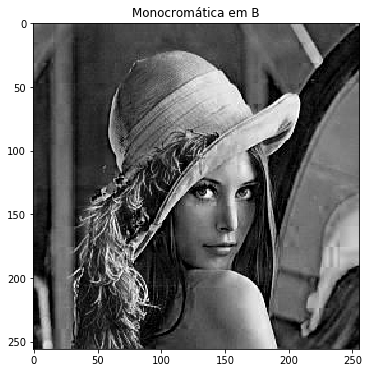

In [13]:
select_band_and_type(img_array, img_height, img_width, band, img_type)

# Negativo

In [14]:
# Create a Band dropdown selector
band_dropdown = widgets.Dropdown(
    options=["RGB","R","G", "B",],
    value="RGB",
    description='Banda:',
    disabled=False,
)

# Global variables
negative_band = "RGB"
                       
def select_band_listener(new_band):
    global negative_band
    negative_band = new_band

# Listen for changes in the dropdown
band_dropdown.observe(lambda b: select_band_listener(b['new']), names="value")

In [15]:
# Negative

def RGB_negative(img, height, width, band = "RGB"):
    rgb_imgage = copy.deepcopy(img)
    for y in range(height):
        for x in range(width):
            if band is "R":
                rgb_imgage[y][x][0] = 255 - rgb_imgage[y][x][0]
            elif band is "G":
                rgb_imgage[y][x][1] = 255 - rgb_imgage[y][x][1]
            elif band is "B":
                rgb_imgage[y][x][2] = 255 - rgb_imgage[y][x][2]
            else:
                rgb_imgage[y][x][0] = 255 - rgb_imgage[y][x][0]
                rgb_imgage[y][x][1] = 255 - rgb_imgage[y][x][1]
                rgb_imgage[y][x][2] = 255 - rgb_imgage[y][x][2]
    return rgb_imgage


def YIQ_negative(img, height, width):
    original = copy.deepcopy(img)
    
    yiq_img = RGBYIQ(original, height, width)
    
    for y in range(height):
        for x in range(width):
            yiq_img[y][x][0] = 255 - img[y][x][0]

    rgb_img = YIQRGB(yiq_img, height, width)  
    return rgb_img

def negative(img, height, width):
    img_array = copy.deepcopy(img)
    img_height = copy.deepcopy(height)
    img_width = copy.deepcopy(width)

    negative_rgb_img = RGB_negative(img_array, img_height, img_width, negative_band)
    negative_yiq_img = YIQ_negative(img_array, img_height, img_width)

    show(negative_rgb_img, (60,6), "{} Negative".format(negative_band))
    show(negative_yiq_img, (60,6), "YIQ Negative")

    
display(band_dropdown)

Dropdown(description='Banda:', options=('RGB', 'R', 'G', 'B'), value='RGB')

Converting image to YIQ...
Image successfully converted


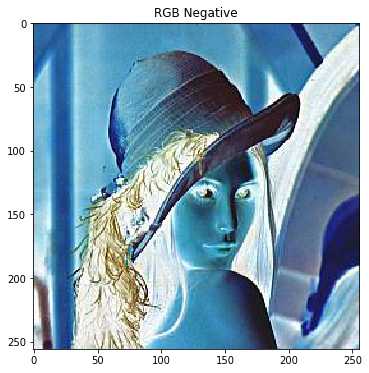

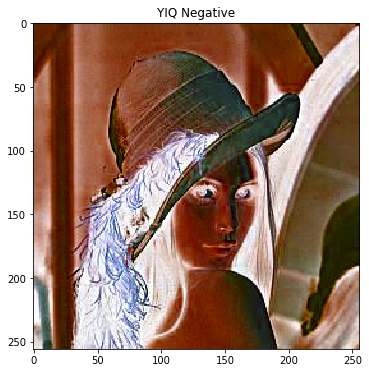

In [16]:
negative(img_array, img_height, img_width)

# Controle de brilho multiplicativo

In [17]:
factor_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=10.0,
    step=0.1,
    description='Fator:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

def on_value_change(change):
    global factor
    factor = change['new']

factor_slider.observe(on_value_change, names='value')

In [18]:
# Controle de brilho multiplicativo
factor = abs(1.0)

def RGB_multiply_brightness(img_array, img_height, img_width, factor):
    if factor < 0:
        return img_array
    
    for y in range(img_height):
        for x in range(img_width):
            p = img_array[y][x].copy()
            # R
            p_r = p[0] * factor
            
            if p_r > 255:
                p_r = 255
            elif p_r < 0:
                p_r = 0
            
            img_array[y][x][0] = p_r 
            
           # G
            p_g = p[1] * factor
            
            if p_g > 255:
                p_g = 255
            elif p_g < 0:
                p_g = 0
            
            img_array[y][x][1] = p_g 
            
            # B
            p_b = p[2] * factor
            
            if p_b > 255:
                p_b = 255
            elif p_b < 0:
                p_b = 0
            
            img_array[y][x][2] = p_b
    
    return np.uint8(img_array)

def YIQ_multiply_brightness(img_array, img_height, img_width, factor):
    if factor < 0:
        return img_array
    
    yiq_img = RGBYIQ(copy.deepcopy(img_array), img_height, img_width)
    
    for y in range(img_height):
        for x in range(img_width):
            Y = yiq_img[y][x][0].copy()
            Y *= factor
            yiq_img[y][x][0] = Y
    
    rgb_img = YIQRGB(copy.deepcopy(yiq_img), img_height, img_width)
    
    return rgb_img
    

def bright_control(img_array, img_height, img_width, factor):
    show(img_array, (60,6), "Original")
    
    img = copy.deepcopy(img_array)
    height = copy.deepcopy(img_height)
    width = copy.deepcopy(img_width)
    
    new_rgb_img = RGB_multiply_brightness(img, height, width, factor)
    new_yiq_img = YIQ_multiply_brightness(img, height, width, factor)
    
    show(new_rgb_img, (60,6), "Controle Multiplicativo RGB - Fator: {}".format(factor))
    show(new_yiq_img, (60,6), "Controle Multiplicativo Y - Fator: {}".format(factor))
    

display(factor_slider)

FloatSlider(value=1.0, continuous_update=False, description='Fator:', max=10.0, min=0.1, readout_format='.1f')

Converting image to YIQ...
Image successfully converted


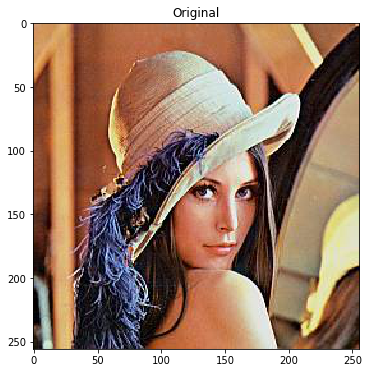

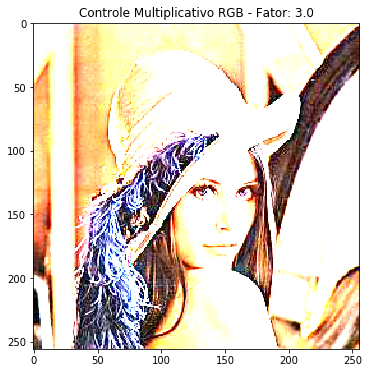

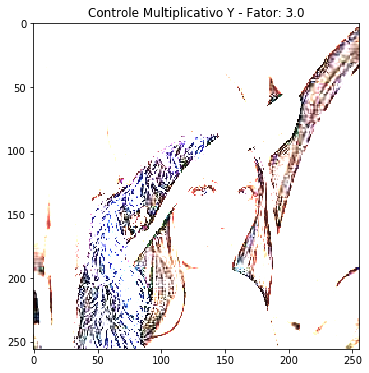

In [20]:
bright_control(img_array, img_height, img_width, factor)

# Convolução

In [34]:
def get_mask():
    mask_file = open('mask.txt', 'rt')
    dimensions = tuple(np.array(mask_file.readline()[:-1].split("x")).astype(int))
    mask = np.zeros(shape=dimensions)
    i = 0
    while(1):
        line = mask_file.readline()[:-1]
        if(line == ""):
            break
        values = np.array(line.split(" ")).astype(float)
        mask[i] = values
        i+= 1

    return mask

size = 3

n = size
m = size

m_media = np.array([[(1/int(n*m)) for i in range(m)] for l in range(n)])
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

mask = get_mask()

In [35]:
def inner_product(img,mask):
    c = np.zeros(img.shape).astype(float)

    for i in range(len(img)):
        for j in range(len(img)):
            p = copy.deepcopy(img[i][j])      
            c[i][j][0] = round(p[0] * mask[i][j])
            c[i][j][1] = round(p[1] * mask[i][j])
            c[i][j][2] = round(p[2] * mask[i][j])

    r = np.sum(c[:,:,0])
    if r > 255:
        r = 255
    elif r < 0:
        r = 0
    g = np.sum(c[:,:,1])
    if g > 255:
        g = 255
    elif g < 0:
        g = 0
    b = np.sum(c[:,:,2])
    if b > 255:
        b = 255
    elif b < 0:
        b = 0    
            
    return [r,g,b]

Num pixels:  63504
Iniciando convolução...
Fim convolução


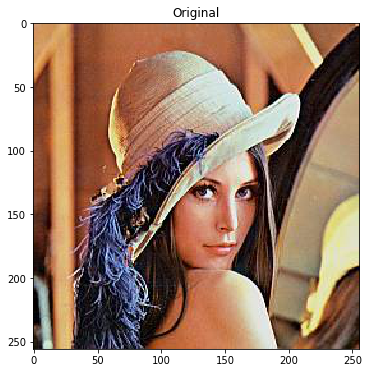

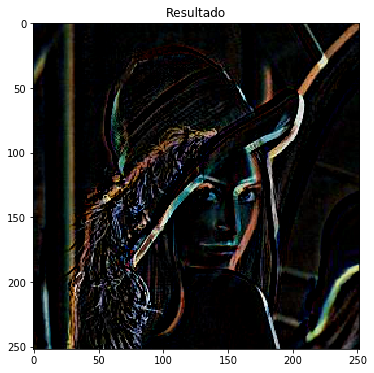

In [37]:
def conv(img_array, img_height, img_width, original_mask):
    img = copy.deepcopy(img_array)
    
    # Rebatimento da mascara
    mask = original_mask[::-1,::-1]
    
    # numero de iteracoes em i (cresce pra baixo):
    it_i = (1 + (len(img) -1) - (len(mask) -1))

    # numero de iteracoes em j (cresce pra direita):
    it_j = (1 + (len(img[0]) -1)- (len(mask[0]) -1))
    
    # Dimensoes da imagem resultante
    i_dim = (len(img)  - len(mask) ) + 1
    j_dim = (len(img[0])  - len(mask[0]) ) + 1
    
    # Cria uma imagem com as dimensoes da final
    img_conv = np.array([[[0,0,0] for j in range(j_dim)] for i in range(i_dim)])
    
    print("Num pixels: ", i_dim * j_dim)
    # Faz convolucao
    print("Iniciando convolução...")
    for i in range(it_i):
        for j in range(it_j):
            sub = img[i:i+len(mask), j:j+len(mask[0])]
            inner_result = inner_product(sub, mask)
            img_conv[i][j] = inner_result   
    print("Fim convolução")
    
    return np.uint8(img_conv)


conv_img = conv(img_array, img_height, img_width, mask)
show(img_array, (60,6), "Original")
show(conv_img, (60,6), "Resultado")



# Mediana

In [28]:
def get_inner_median(img):
    return [np.median(img[:,:,0]), np.median(img[:,:,1]), np.median(img[:,:,2])]

Num pixels:  63504
Iniciando Mediana...
Fim Mediana


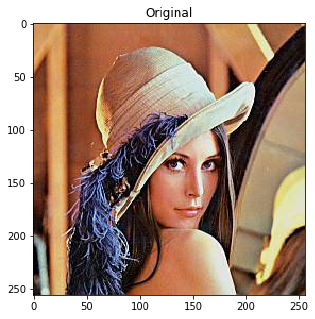

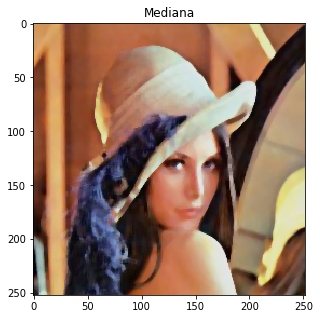

In [32]:
def median(img_array, img_height, img_width, n, m):
    img = copy.deepcopy(img_array)
    
    # numero de iteracoes em i (cresce pra baixo):
    it_i = (1 + (len(img) -1) - (n -1))

    # numero de iteracoes em j (cresce pra direita):
    it_j = (1 + (len(img[0]) -1)- (m -1))
    
    # Dimensoes da imagem resultante
    i_dim = (len(img)  - n ) + 1
    j_dim = (len(img[0])  - m ) + 1
    
    # Cria uma imagem com as dimensoes da final
    img_conv = np.array([[[0,0,0] for j in range(j_dim)] for i in range(i_dim)])
    
    print("Num pixels: ", i_dim * j_dim)

    print("Iniciando Mediana...")

    for i in range(it_i):
        for j in range(it_j):
            sub = img[i:i+n, j:j+m]
            inner_result = get_inner_median(sub)
            img_conv[i][j] = inner_result

    print("Fim Mediana")
    
    return np.uint8(img_conv)

median_img = median(img_array, img_height, img_width, 5,5)
show(img_array, (60,5), "Original")
show(median_img, (60,5), "Mediana")